In [7]:
from extreme_classification.distributions import multivariate_logistic_distribution
from extreme_classification.extreme_dataset import ExtremeDataset, BivariateLogisticDataset
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [61]:
train_dataset = BivariateLogisticDataset(
    sizes=[5000, 5000],
    alphas=[0.1, 0.5],
    labels=[0, 1],
    ranktransform=False
)

test_dataset = BivariateLogisticDataset(
    sizes=[50000, 50000],
    alphas=[0.1, 0.5],
    labels=[0, 1],
    ranktransform=False
)

Text(0.5, 1.0, 'Transformed samples from the train dataset in [0, 120] x [0, 120]')

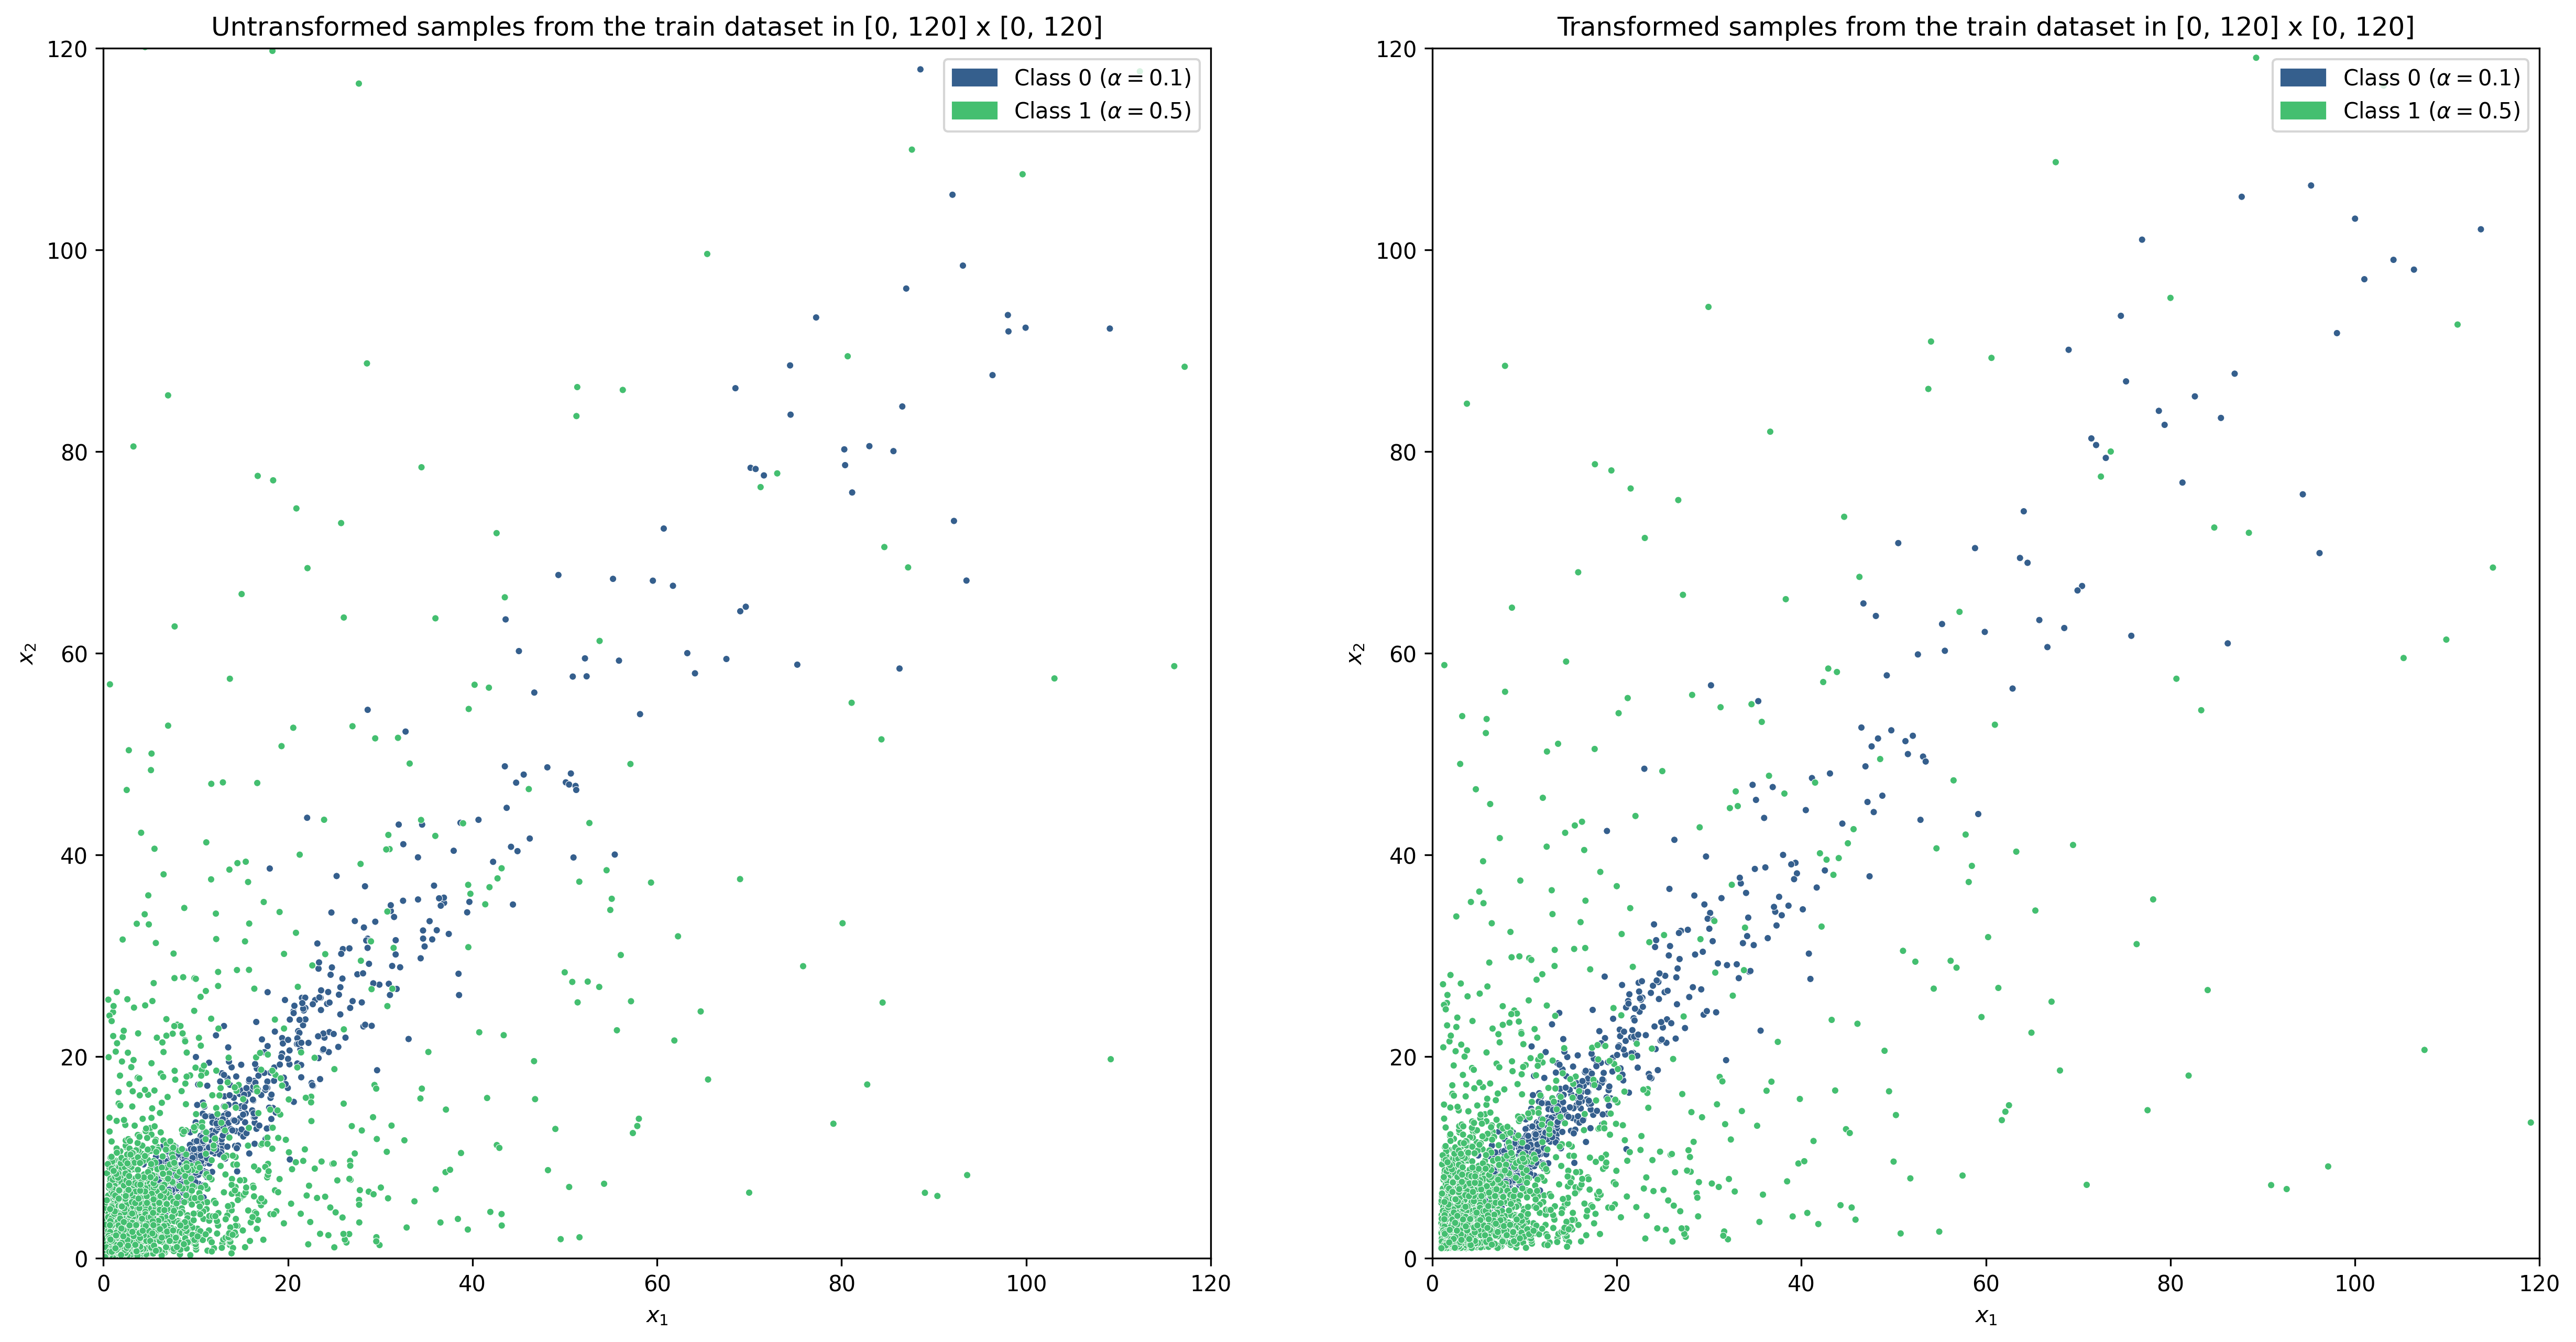

In [62]:
colormap = plt.cm.viridis
colors = [colormap(0.3) if label == 0 else colormap(0.7) for label in train_dataset.labels]


plt.figure(figsize=(20, 10), dpi=300)

plt.subplot(1, 2, 1)
sns.scatterplot(x=train_dataset.X[:, 0], y=train_dataset.X[:, 1], c=colors, s=10)
plt.xlim(0, 120)
plt.ylim(0, 120)
plt.legend(handles=[
    mpatches.Patch(color=colormap(0.3), label='Class 0 ($\\alpha=0.1$)'),
    mpatches.Patch(color=colormap(0.7), label='Class 1 ($\\alpha=0.5$)'),
], loc='upper right')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Untransformed samples from the train dataset in [0, 120] x [0, 120]')


V = np.zeros(train_dataset.X.shape)
for i in range(train_dataset.X.shape[1]):
    V[:, i] = 1 / (1 - np.argsort(np.argsort(train_dataset.X[:, i])) / (train_dataset.X.shape[0]+1))

plt.subplot(1, 2, 2)
sns.scatterplot(x=V[:, 0], y=V[:, 1], c=colors, s=10)
plt.xlim(0, 120)
plt.ylim(0, 120)
plt.legend(handles=[
    mpatches.Patch(color=colormap(0.3), label='Class 0 ($\\alpha=0.1$)'),
    mpatches.Patch(color=colormap(0.7), label='Class 1 ($\\alpha=0.5$)'),
], loc='upper right')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Transformed samples from the train dataset in [0, 120] x [0, 120]')



### Polar Coordinates of the training dataset

In [63]:
train_dataset = BivariateLogisticDataset(
    sizes=[50000, 50000],
    alphas=[0.1, 0.5],
    labels=[0, 1],
    ranktransform=True
)

test_dataset = BivariateLogisticDataset(
    sizes=[50000, 50000],
    alphas=[0.1, 0.5],
    labels=[0, 1],
    ranktransform=True
)

In [64]:
def polar_transformation(X):
    V = np.zeros(X.shape)
    V[:, 0] = np.sqrt(X[:, 0]**2 + X[:, 1]**2)
    V[:, 1] = np.arctan2(X[:, 1], X[:, 0])
    return V

In [65]:
polar_train_dataframe = train_dataset.dataframe.copy()
polar_train_dataframe[['radius', 'theta']] = polar_transformation(train_dataset.X)

In [66]:
polar_train_dataframe

,0,1,labels,norm,radius,theta
0,1.141186,1.141408,0.0,2.282594,1.614037,0.785495
1,12.618423,14.120446,0.0,26.738869,18.937043,0.841513
2,2.664420,2.471296,0.0,5.135716,3.634066,0.747812
3,1.238433,1.211091,0.0,2.449524,1.732183,0.774236
4,1.119656,1.074309,0.0,2.193966,1.551699,0.764732
...,...,...,...,...,...,...
99995,1.068410,1.162086,1.0,2.230496,1.578589,0.827372
99996,2.031467,4.682572,1.0,6.714039,5.104247,1.161466
99997,1.692322,1.715489,1.0,3.407811,2.409742,0.792196
99998,1.245249,10.072623,1.0,11.317872,10.149304,1.447793


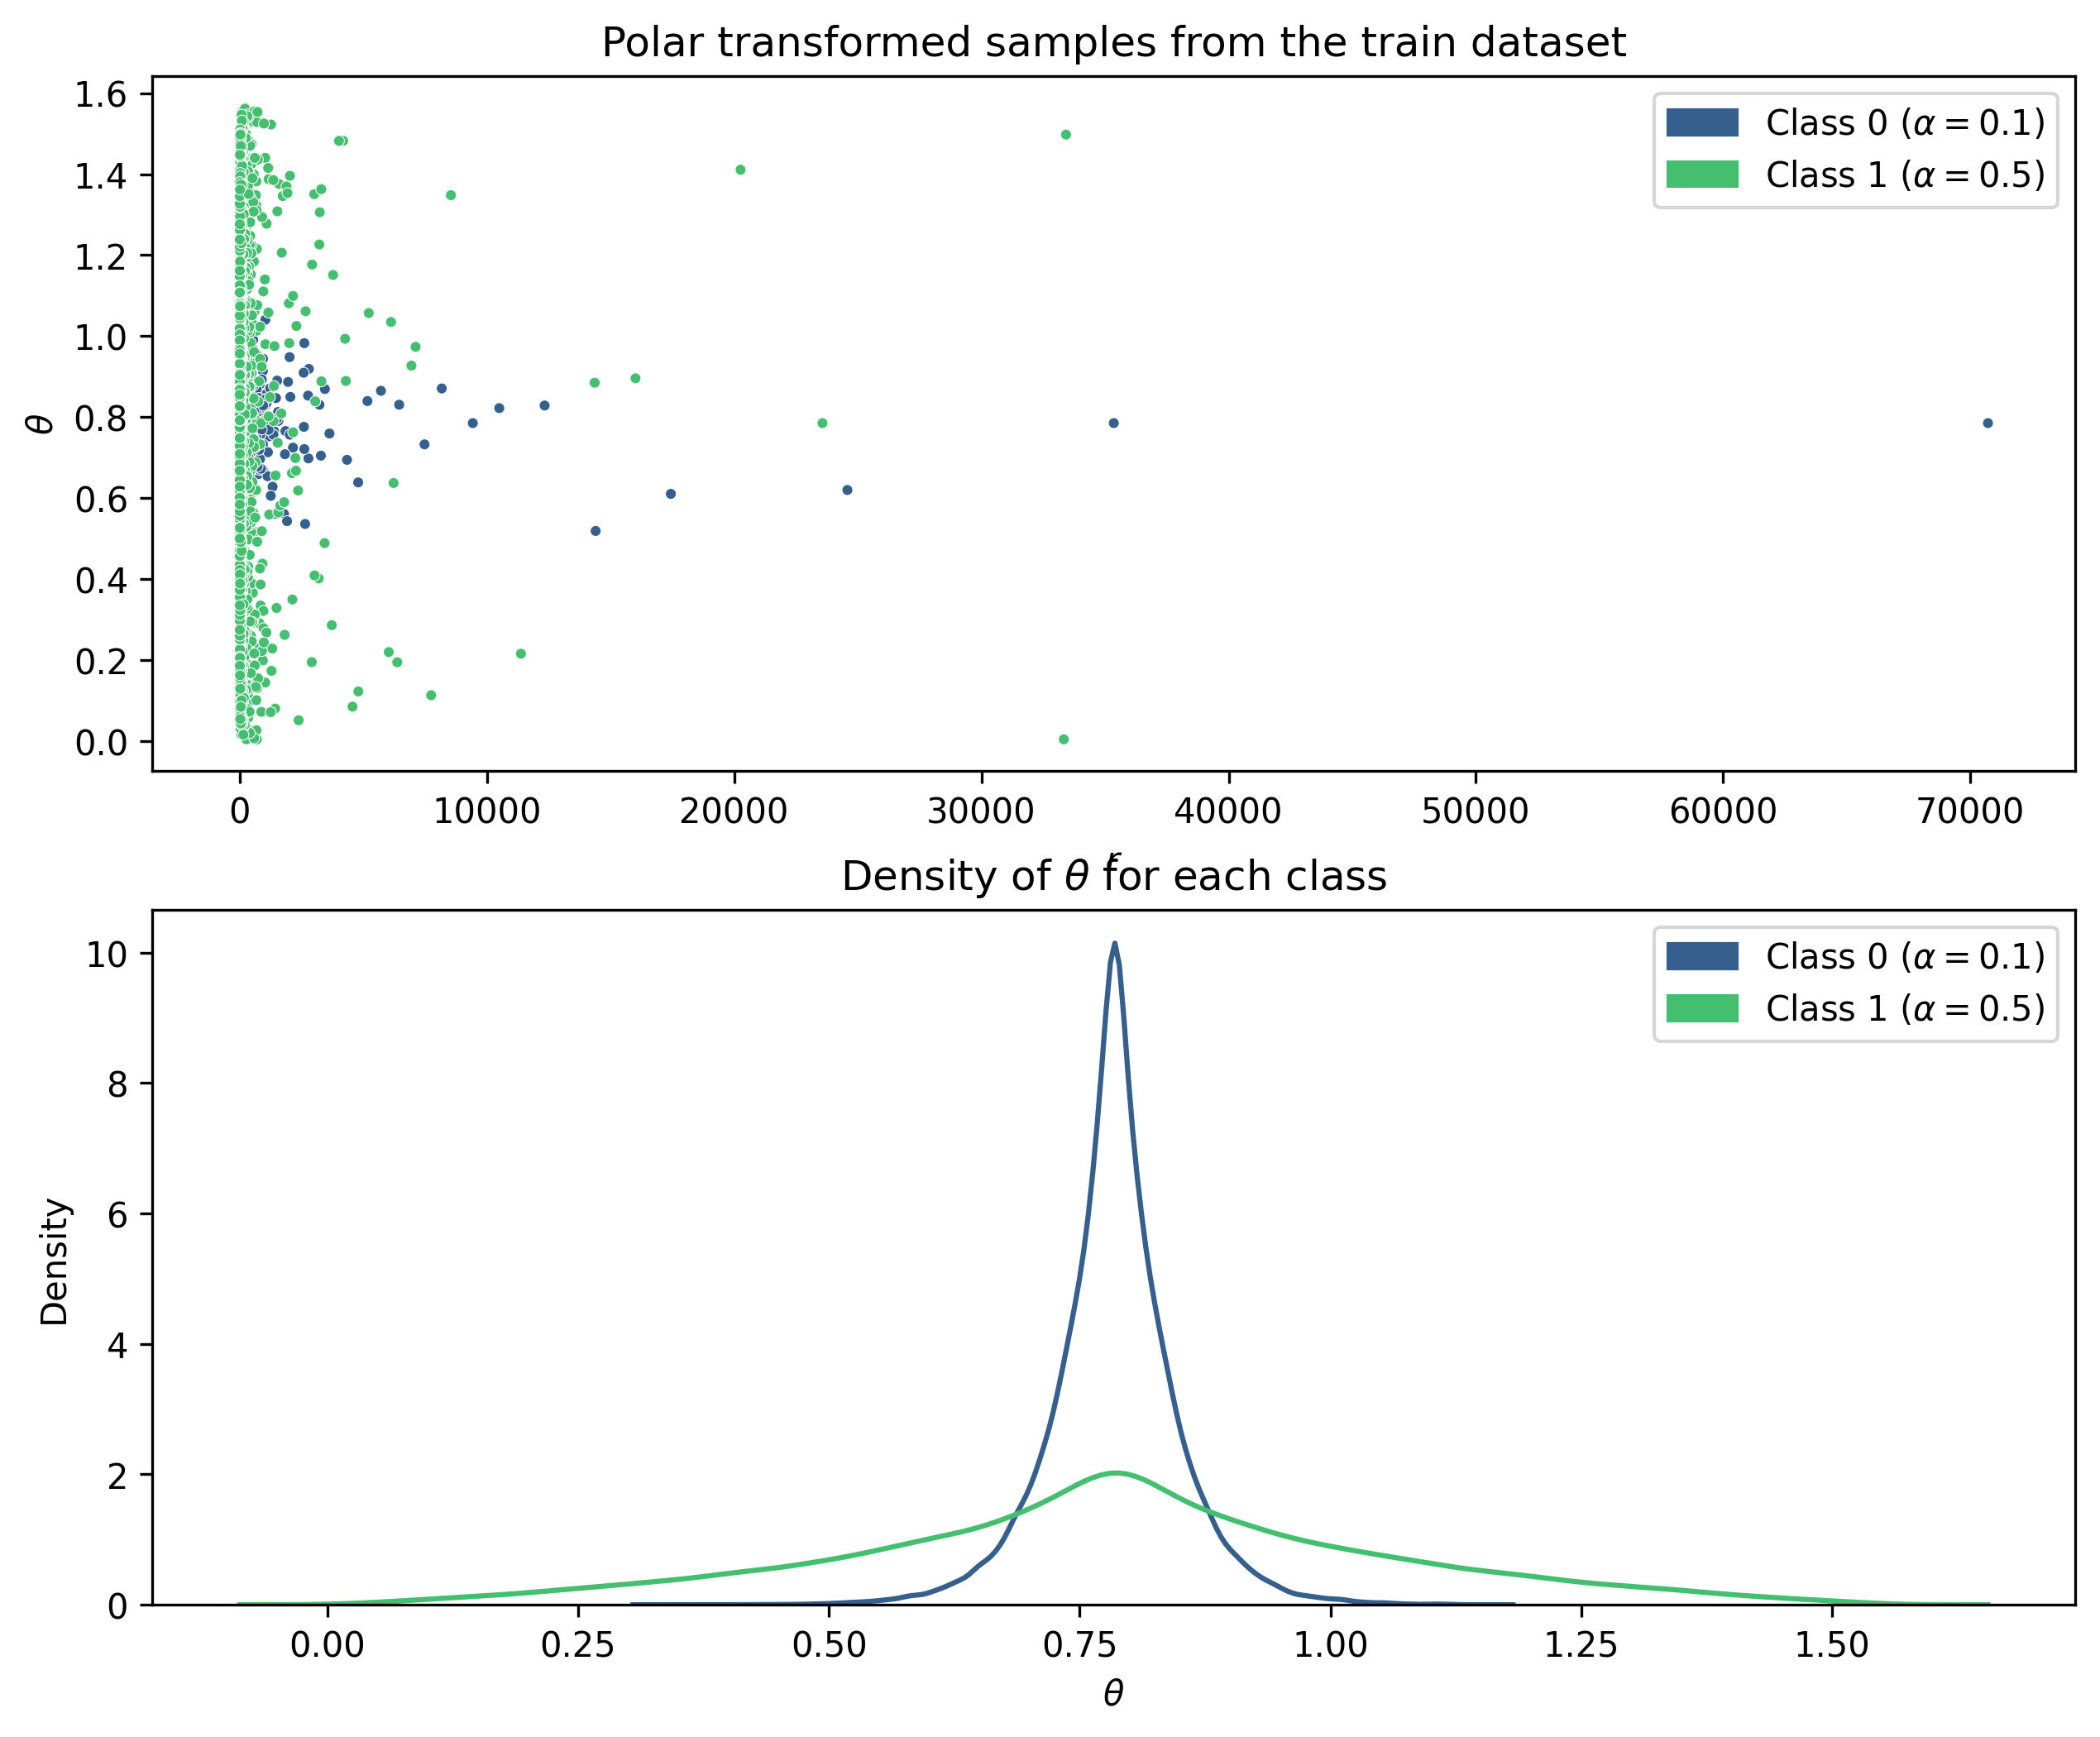

In [81]:
plt.figure(figsize=(10, 8), dpi=300)

colors = [colormap(0.3) if label == 0 else colormap(0.7) for label in polar_train_dataframe['labels']]

plt.subplot(2, 1, 1)
sns.scatterplot(x=polar_train_dataframe['radius'], y=polar_train_dataframe['theta'], c=colors, s=10)
plt.legend(handles=[
    mpatches.Patch(color=colormap(0.3), label='Class 0 ($\\alpha=0.1$)'),
    mpatches.Patch(color=colormap(0.7), label='Class 1 ($\\alpha=0.5$)'),
], loc='upper right')
plt.xlabel('$r$')
plt.ylabel('$\\theta$')
plt.title('Polar transformed samples from the train dataset')

# Plot density of theta for each class
plt.subplot(2, 1, 2)
sns.kdeplot(polar_train_dataframe[polar_train_dataframe['labels'] == 0]['theta'], color=colormap(0.3))
sns.kdeplot(polar_train_dataframe[polar_train_dataframe['labels'] == 1]['theta'], color=colormap(0.7))
plt.legend(handles=[
    mpatches.Patch(color=colormap(0.3), label='Class 0 ($\\alpha=0.1$)'),
    mpatches.Patch(color=colormap(0.7), label='Class 1 ($\\alpha=0.5$)'),
], loc='upper right')
plt.xlabel('$\\theta$')
plt.ylabel('Density')
plt.title('Density of $\\theta$ for each class')

plt.savefig('polar_transformation.png', dpi=300, transparent=True)

### Polar Coordinates of the training dataset in the extremes

In [82]:
# Extract k samples of polar_train_dataframe with highes norm
k = 1000

polar_extreme_train_dataframe = polar_train_dataframe.copy()
polar_extreme_train_dataframe = polar_extreme_train_dataframe.sort_values(by='norm', ascending=False)
polar_extreme_train_dataframe = polar_extreme_train_dataframe.iloc[:k]


In [83]:
polar_extreme_train_dataframe

,0,1,labels,norm,radius,theta
15112,50000.500000,50000.500000,0.0,100001.000000,70711.385225,0.785398
13034,25000.250000,25000.250000,0.0,50000.500000,35355.692613,0.785398
91040,2439.048780,33333.666667,1.0,35772.715447,33422.781039,1.497756
27133,20000.200000,14285.857143,0.0,34286.057143,24578.317972,0.620249
78528,33333.666667,156.496088,1.0,33490.162754,33334.034026,0.004695
...,...,...,...,...,...,...
11441,95.329838,106.270988,0.0,201.600826,142.763094,0.839616
60293,132.627321,68.634866,1.0,201.262187,149.334360,0.477551
56808,77.580295,122.851351,1.0,200.431646,145.296788,1.007538
78909,186.917757,13.376271,1.0,200.294028,187.395764,0.071441


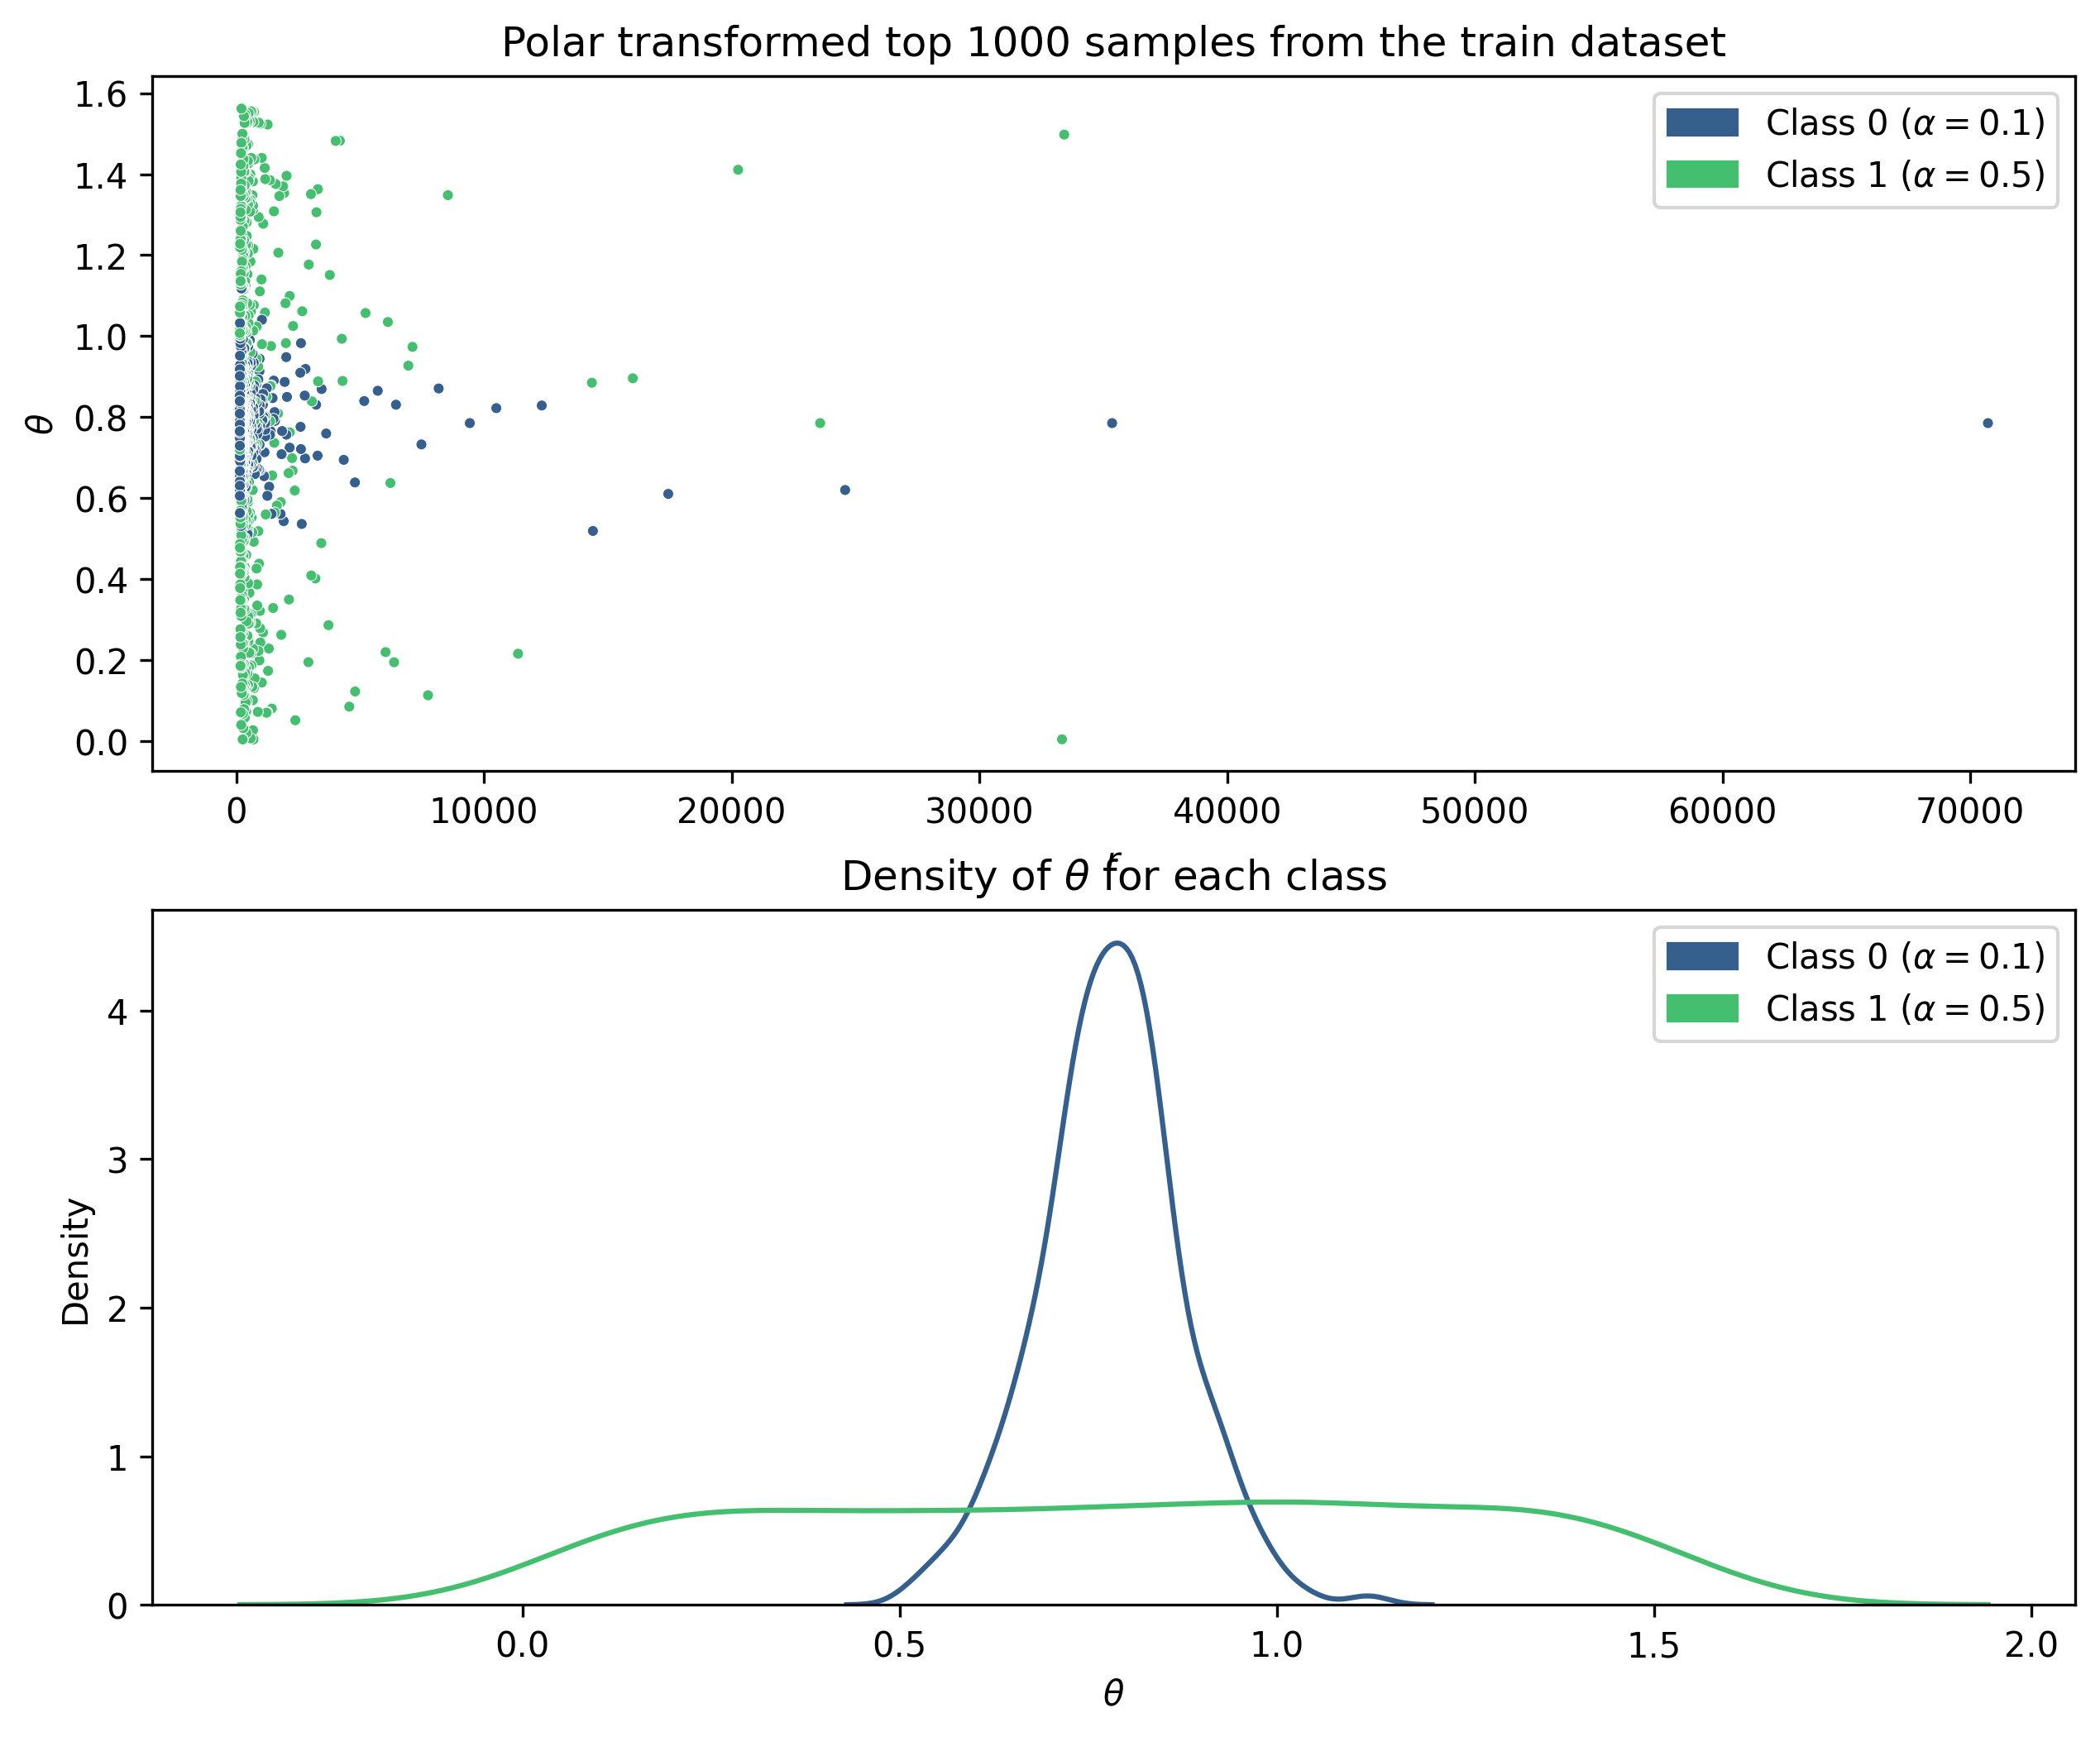

In [86]:
colors = [colormap(0.3) if label == 0 else colormap(0.7) for label in polar_extreme_train_dataframe['labels']]

plt.figure(figsize=(10, 8), dpi=300)

# plt.subplot(3, 1, 1)


# sns.scatterplot(x=polar_extreme_train_dataframe.iloc[:, 0], y=polar_extreme_train_dataframe.iloc[:, 1], c=colors, s=10)
# # plt.xlim(0, 120)
# # plt.ylim(0, 120)
# plt.legend(handles=[
#     mpatches.Patch(color=colormap(0.3), label='Class 0 ($\\alpha=0.1$)'),
#     mpatches.Patch(color=colormap(0.7), label='Class 1 ($\\alpha=0.5$)'),
# ], loc='upper right')
# plt.xlabel('$x_1$')
# plt.ylabel('$x_2$')

plt.subplot(2, 1, 1)

sns.scatterplot(x=polar_extreme_train_dataframe['radius'], y=polar_extreme_train_dataframe['theta'], c=colors, s=10)
# plt.xlim(0, 120)
# plt.ylim(0, 120)
plt.legend(handles=[
    mpatches.Patch(color=colormap(0.3), label='Class 0 ($\\alpha=0.1$)'),
    mpatches.Patch(color=colormap(0.7), label='Class 1 ($\\alpha=0.5$)'),
], loc='upper right')
plt.xlabel('$r$')
plt.ylabel('$\\theta$')
plt.title('Polar transformed top 1000 samples from the train dataset')

plt.subplot(2, 1, 2)

sns.kdeplot(polar_extreme_train_dataframe[polar_extreme_train_dataframe['labels'] == 0]['theta'], color=colormap(0.3))
sns.kdeplot(polar_extreme_train_dataframe[polar_extreme_train_dataframe['labels'] == 1]['theta'], color=colormap(0.7))
plt.legend(handles=[
    mpatches.Patch(color=colormap(0.3), label='Class 0 ($\\alpha=0.1$)'),
    mpatches.Patch(color=colormap(0.7), label='Class 1 ($\\alpha=0.5$)'),
], loc='upper right')
plt.xlabel('$\\theta$')
plt.ylabel('Density')
plt.title('Density of $\\theta$ for each class')

plt.savefig('polar_transformation_extreme.png', dpi=300, transparent=True)

### Feature Importance in the Extreme

1.0


Text(0.5, 1.0, 'Feature importances for the random forest classifier trained on the polar extreme train dataframe')

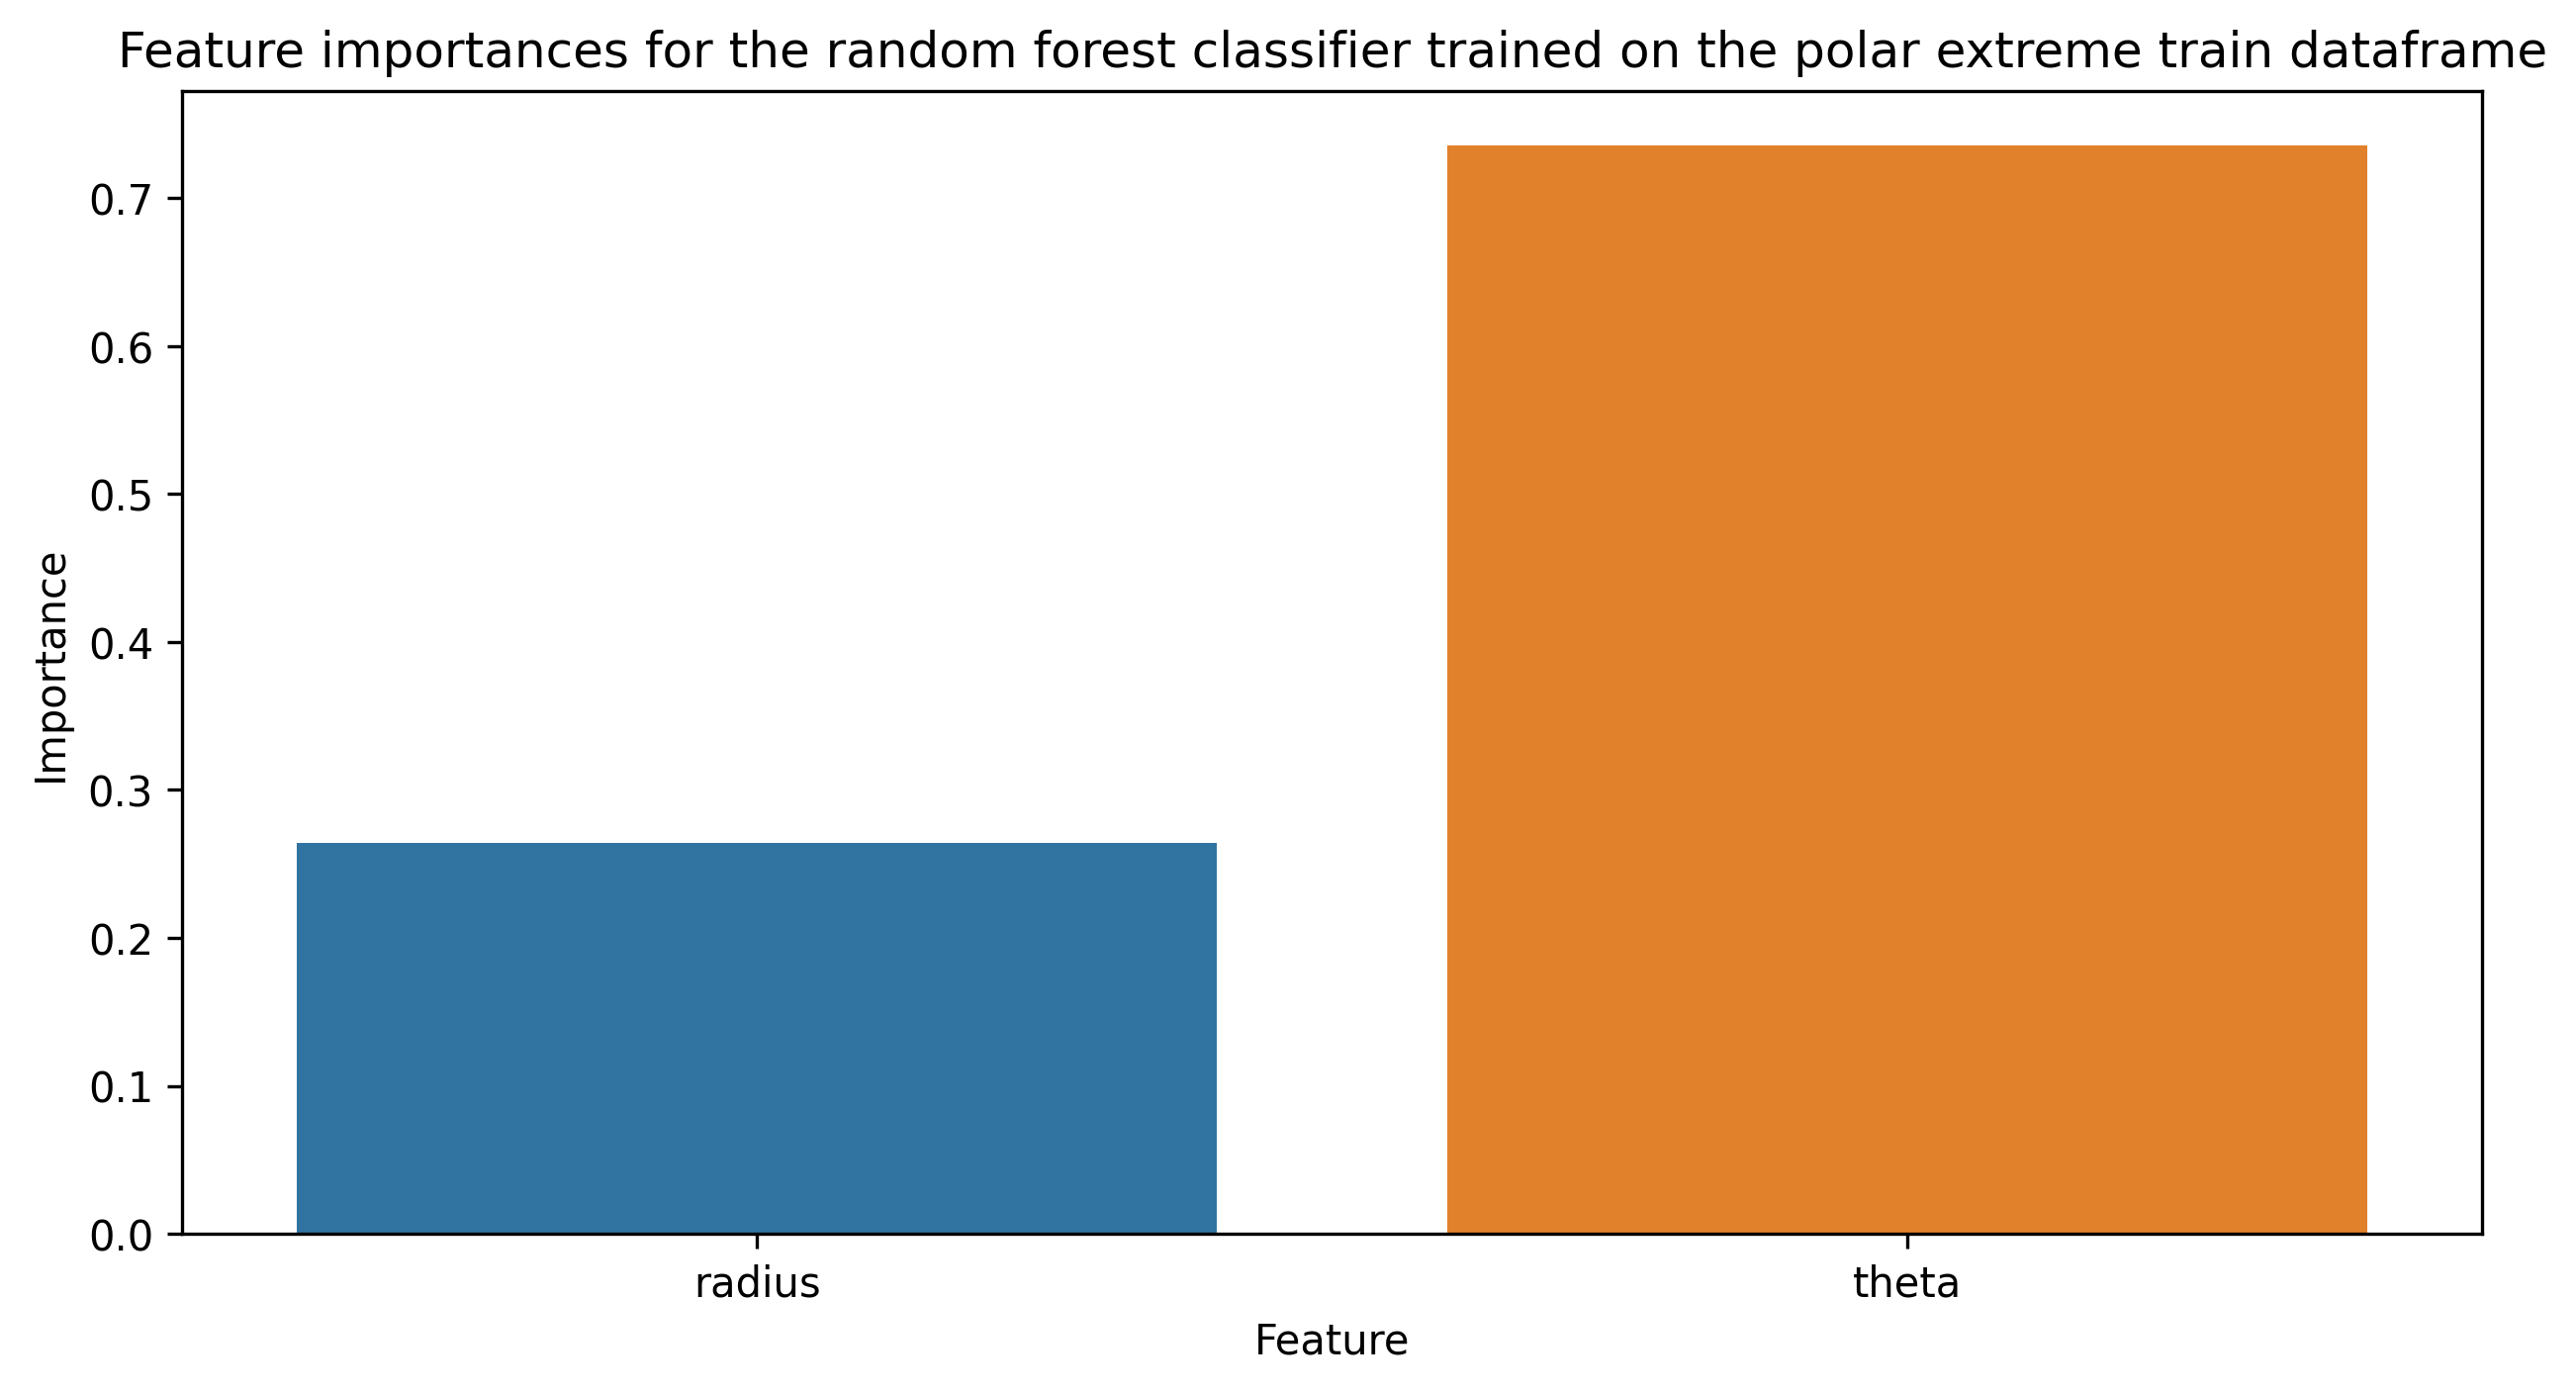

In [72]:
# Import random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train random forest classifier on polar extreme train dataframe
rf = RandomForestClassifier(n_estimators=200)
rf.fit(polar_extreme_train_dataframe[['radius', 'theta']], polar_extreme_train_dataframe['labels'])

# Show the accuracy of the classifier on the train dataset
print(accuracy_score(polar_extreme_train_dataframe['labels'], rf.predict(polar_extreme_train_dataframe[['radius', 'theta']])))

# Plot the feature importances for each feature
plt.figure(figsize=(10, 5), dpi=300)
sns.barplot(x=['radius', 'theta'], y=rf.feature_importances_)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature importances for the random forest classifier trained on the polar extreme train dataframe')


In [73]:
def get_extreme_polar(dataset, k=100):
    polar_dataframe = dataset.dataframe.copy()
    polar_dataframe[['radius', 'theta']] = polar_transformation(dataset.X)
    polar_dataframe = polar_dataframe.sort_values(by='norm', ascending=False)
    if k is not None:
        polar_dataframe = polar_dataframe.iloc[:k]
    return polar_dataframe

In [74]:
ks = np.linspace(100, 10000, 50, dtype=int)
kappas = np.linspace(0.1, 0.9, 9)

accuracies = []
test_accuracies = []
feature_importances = []

for k in ks:
    polar_extreme_train_dataframe = get_extreme_polar(train_dataset, k=k)
    rf = RandomForestClassifier(n_estimators=200)
    rf.fit(polar_extreme_train_dataframe[['radius', 'theta']], polar_extreme_train_dataframe['labels'])
    accuracies.append(accuracy_score(polar_extreme_train_dataframe['labels'], rf.predict(polar_extreme_train_dataframe[['radius', 'theta']])))
    feature_importances.append(rf.feature_importances_)

    # polar_extreme_test_dataframe = get_extreme_polar(test_dataset, None)
    # # Extract only the test samples that are greater than the kth largest norm in the train dataset
    # polar_extreme_test_dataframe = polar_extreme_test_dataframe[polar_extreme_test_dataframe['norm'] > polar_extreme_train_dataframe.iloc[-1]['norm']]
    # test_accuracies.append(accuracy_score(polar_extreme_test_dataframe['labels'], rf.predict(polar_extreme_test_dataframe[['radius', 'theta']])))
    print(k, accuracies[-1], feature_importances[-1])

100 1.0 [0.34366037 0.65633963]
302 1.0 [0.29580122 0.70419878]
504 1.0 [0.29700323 0.70299677]
706 1.0 [0.26959616 0.73040384]
908 1.0 [0.26858473 0.73141527]
1110 1.0 [0.25655204 0.74344796]
1312 1.0 [0.24970535 0.75029465]
1514 1.0 [0.25007418 0.74992582]
1716 1.0 [0.25070845 0.74929155]
1918 1.0 [0.25336479 0.74663521]
2120 1.0 [0.24917528 0.75082472]
2322 1.0 [0.24536427 0.75463573]
2524 1.0 [0.24796405 0.75203595]
2726 1.0 [0.242567 0.757433]
2928 1.0 [0.24058064 0.75941936]
3130 1.0 [0.2427074 0.7572926]
3332 1.0 [0.24452361 0.75547639]
3534 1.0 [0.24317104 0.75682896]
3736 1.0 [0.24230912 0.75769088]
3938 1.0 [0.24297112 0.75702888]
4140 1.0 [0.24007312 0.75992688]
4342 1.0 [0.24165367 0.75834633]
4544 1.0 [0.24361248 0.75638752]
4746 1.0 [0.24599183 0.75400817]
4948 1.0 [0.2440065 0.7559935]
5151 1.0 [0.24443455 0.75556545]
5353 1.0 [0.2437149 0.7562851]
5555 1.0 [0.23928721 0.76071279]
5757 1.0 [0.24151563 0.75848437]
5959 1.0 [0.23958741 0.76041259]
6161 1.0 [0.24074902 0.75

In [75]:
# Plot the accuracy of the classifier on the train dataset and test dataset
# plt.figure(figsize=(10, 5), dpi=300)
# sns.lineplot(x=ks, y=accuracies, color='blue', label='Train')
# sns.lineplot(x=ks, y=test_accuracies, color='red', label='Test')
# plt.xlabel('k')
# plt.ylabel('Accuracy')
# plt.title('Accuracy of the random forest classifier trained on the polar extreme train dataframe')

Text(0.5, 1.0, 'Feature importances for the random forest classifier trained on the polar extreme train dataframe')

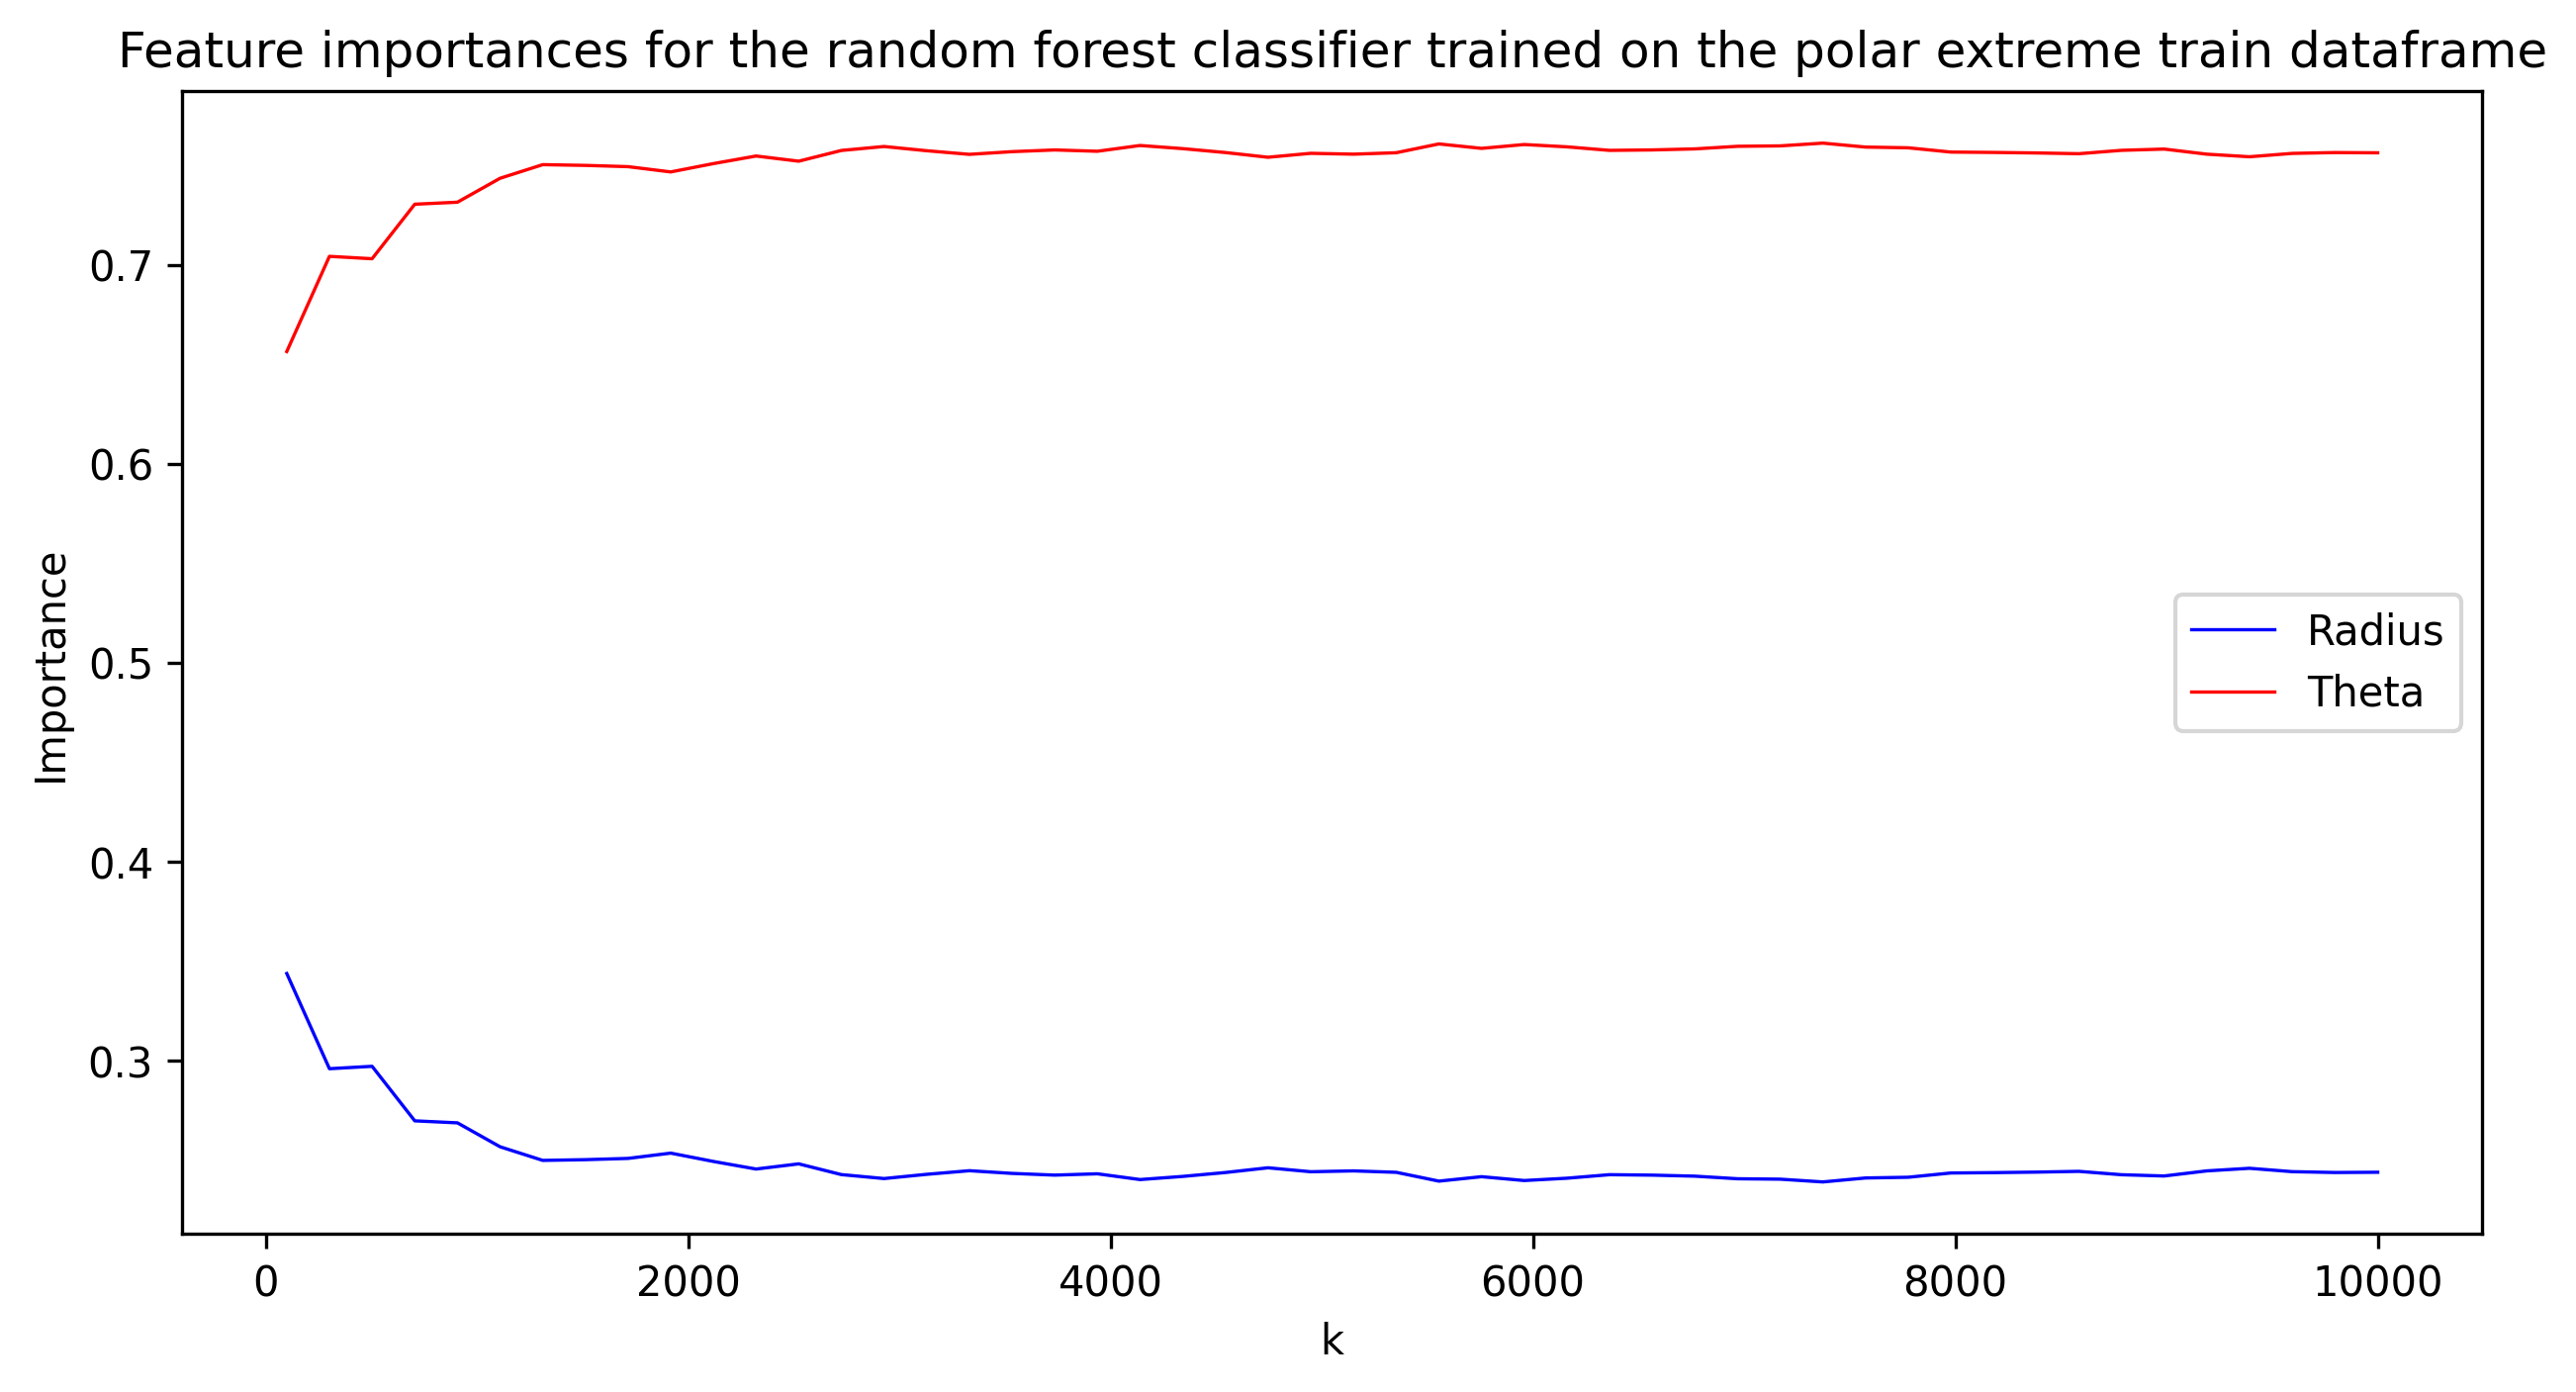

In [76]:
# Show the feature importances for each feature
plt.figure(figsize=(10, 5), dpi=300)
sns.lineplot(x=ks, y=np.array(feature_importances)[:, 0], color='blue', label='Radius', linewidth=0.8)
sns.lineplot(x=ks, y=np.array(feature_importances)[:, 1], color='red', label='Theta', linewidth=0.8)
plt.xlabel('k')
plt.ylabel('Importance')
plt.title('Feature importances for the random forest classifier trained on the polar extreme train dataframe')

In [78]:
train_dataset.X.shape[0]

100000

In [77]:
# logspapce from 100 to all samples
ks = np.logspace(2, np.log10(train_dataset.X.shape[0]), 50, dtype=int)
kappas = np.linspace(0.1, 0.9, 9)

accuracies = []
test_accuracies = []
feature_importances = []

for k in ks:
    polar_extreme_train_dataframe = get_extreme_polar(train_dataset, k=k)
    rf = RandomForestClassifier(n_estimators=200)
    rf.fit(polar_extreme_train_dataframe[['radius', 'theta']], polar_extreme_train_dataframe['labels'])
    accuracies.append(accuracy_score(polar_extreme_train_dataframe['labels'], rf.predict(polar_extreme_train_dataframe[['radius', 'theta']])))
    feature_importances.append(rf.feature_importances_)

    # polar_extreme_test_dataframe = get_extreme_polar(test_dataset, None)
    # # Extract only the test samples that are greater than the kth largest norm in the train dataset
    # polar_extreme_test_dataframe = polar_extreme_test_dataframe[polar_extreme_test_dataframe['norm'] > polar_extreme_train_dataframe.iloc[-1]['norm']]
    # test_accuracies.append(accuracy_score(polar_extreme_test_dataframe['labels'], rf.predict(polar_extreme_test_dataframe[['radius', 'theta']])))
    print(k, accuracies[-1], feature_importances[-1])

100 1.0 [0.34443596 0.65556404]
115 1.0 [0.37042511 0.62957489]
132 1.0 [0.36583781 0.63416219]
152 1.0 [0.36807637 0.63192363]
175 1.0 [0.34033104 0.65966896]
202 1.0 [0.32524172 0.67475828]
232 1.0 [0.31371805 0.68628195]
268 1.0 [0.31332196 0.68667804]
308 1.0 [0.3049405 0.6950595]
355 1.0 [0.2979848 0.7020152]
409 1.0 [0.30103756 0.69896244]
471 1.0 [0.29407883 0.70592117]
542 1.0 [0.27651412 0.72348588]
625 1.0 [0.27667218 0.72332782]
719 1.0 [0.26667512 0.73332488]
828 1.0 [0.26134144 0.73865856]
954 1.0 [0.26251679 0.73748321]
1098 1.0 [0.25292585 0.74707415]
1264 1.0 [0.25399433 0.74600567]
1456 1.0 [0.25098726 0.74901274]
1676 1.0 [0.25853058 0.74146942]
1930 1.0 [0.2505508 0.7494492]
2222 1.0 [0.24740137 0.75259863]
2559 1.0 [0.2500231 0.7499769]
2947 1.0 [0.24117458 0.75882542]
3393 1.0 [0.24267694 0.75732306]
3906 1.0 [0.24271676 0.75728324]
4498 1.0 [0.24390987 0.75609013]
5179 1.0 [0.24413383 0.75586617]
5963 1.0 [0.24008095 0.75991905]
6866 1.0 [0.24126366 0.75873634]
79

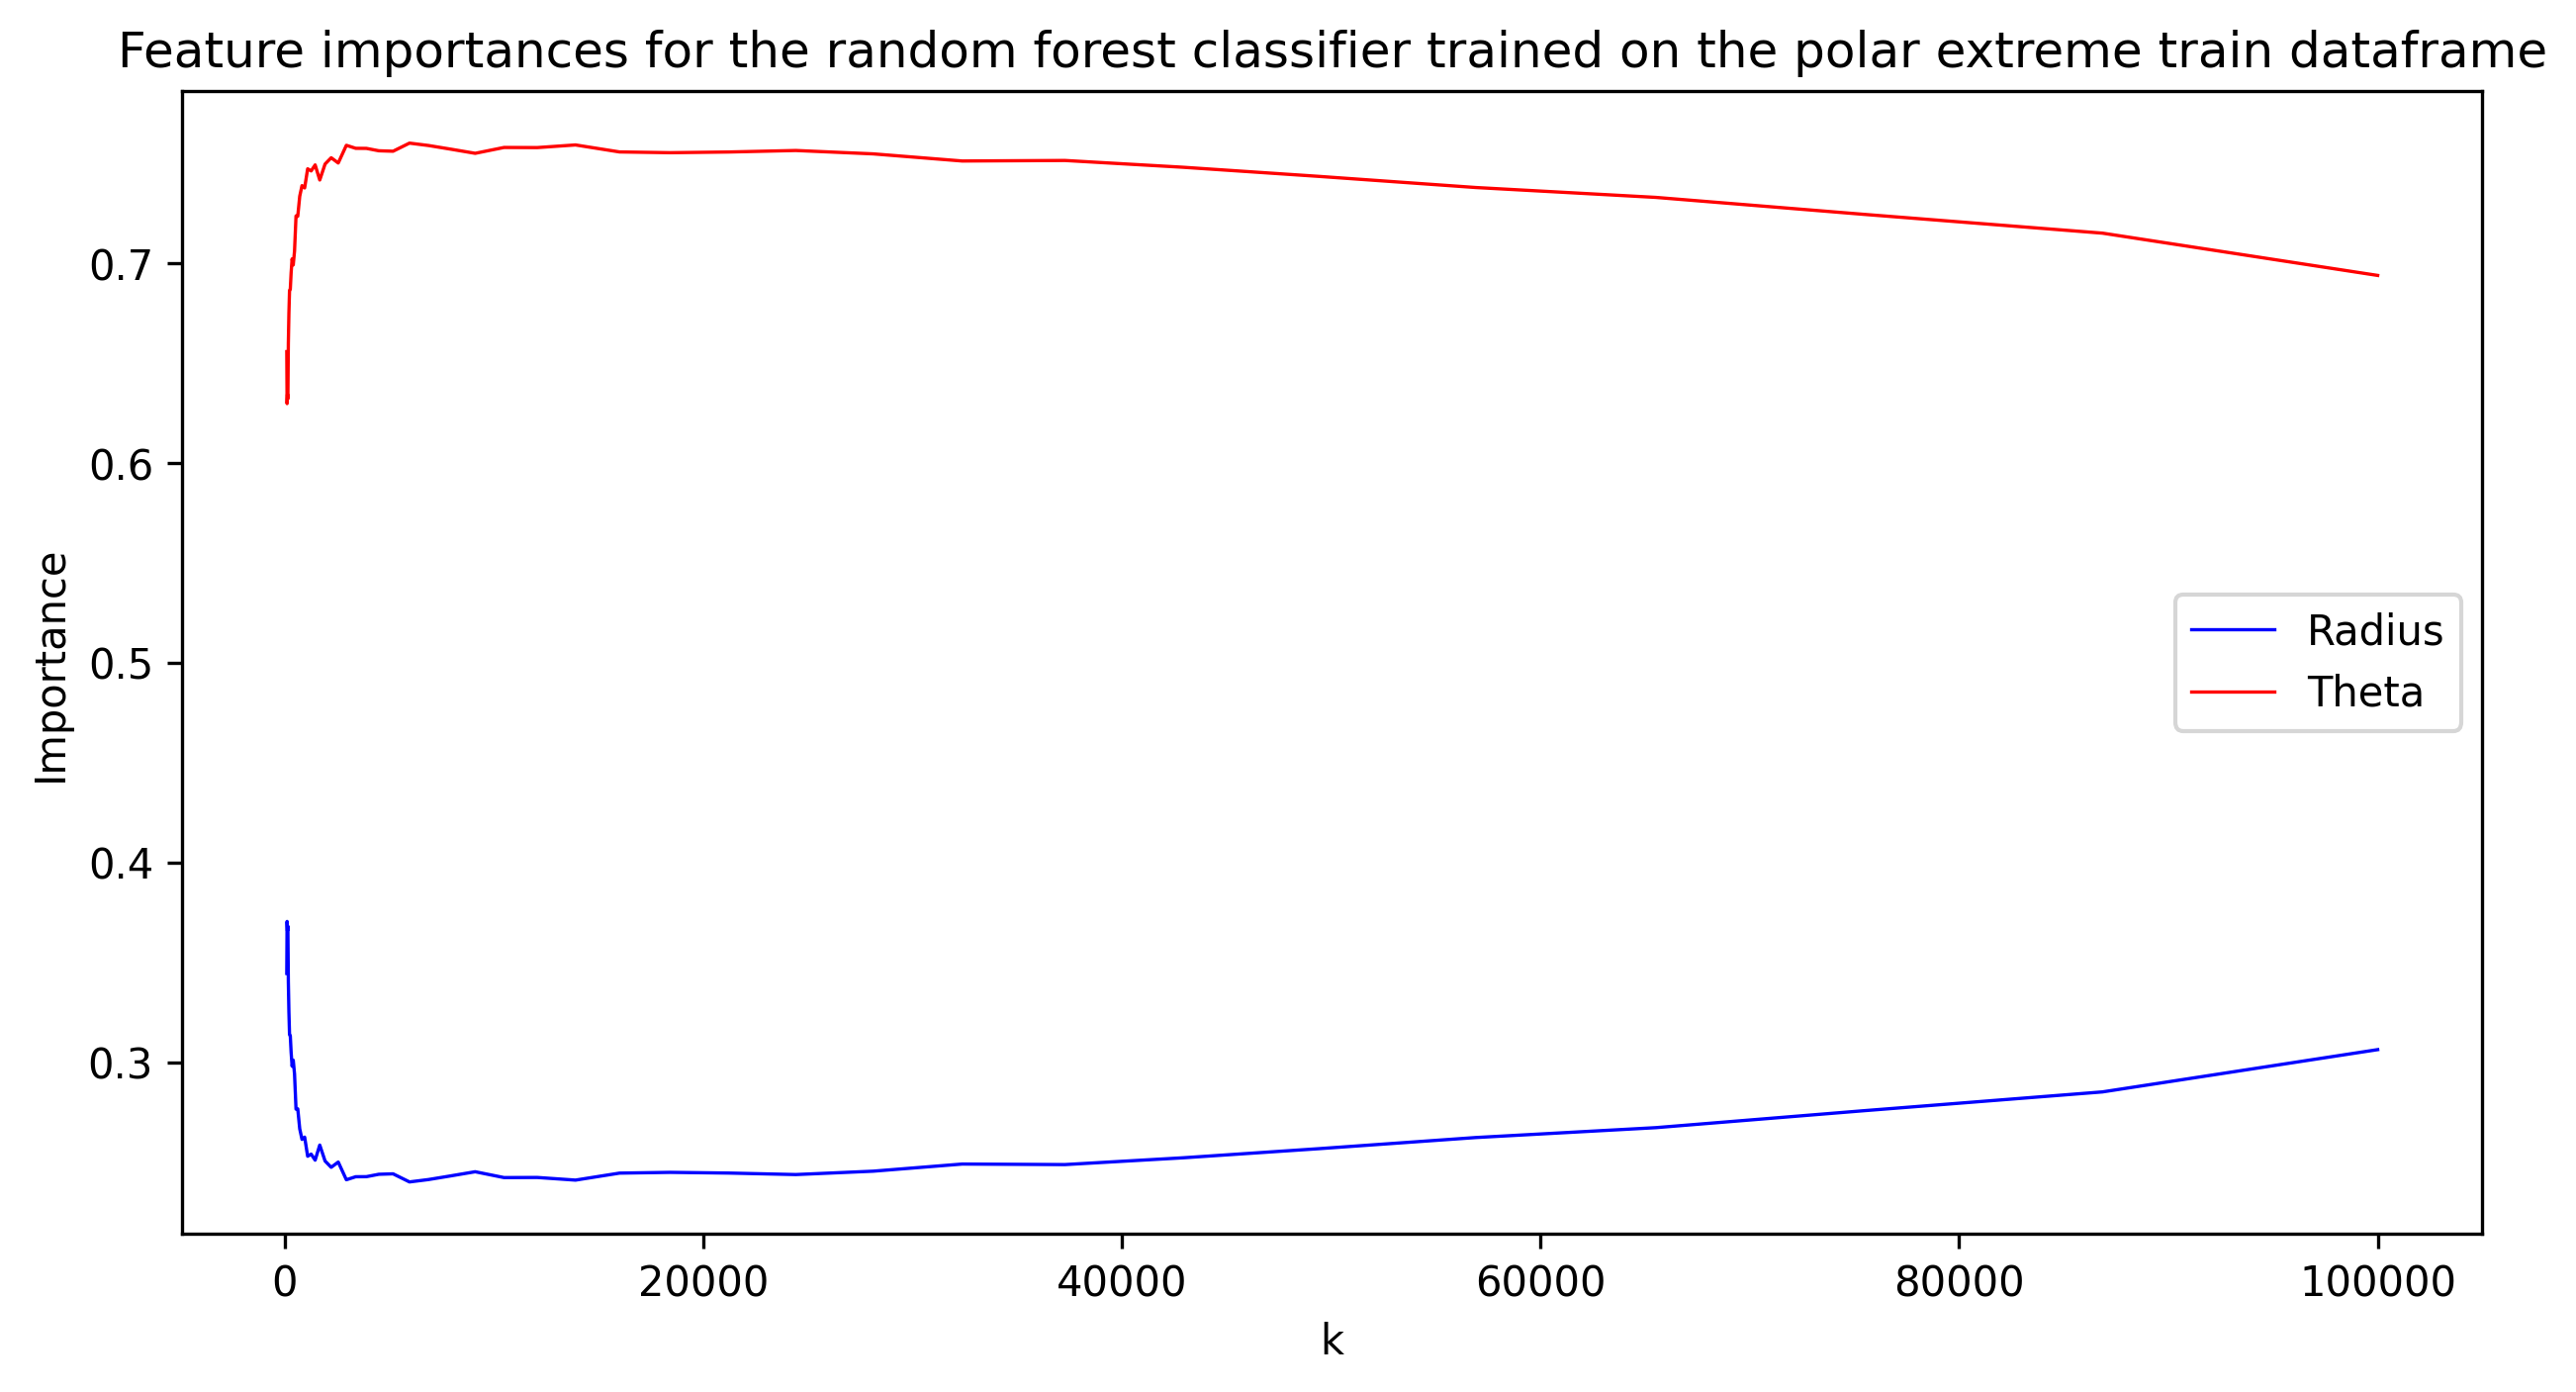

In [80]:
# Show the feature importances for each feature
plt.figure(figsize=(10, 5), dpi=300)
sns.lineplot(x=ks, y=np.array(feature_importances)[:, 0], color='blue', label='Radius', linewidth=0.8)
sns.lineplot(x=ks, y=np.array(feature_importances)[:, 1], color='red', label='Theta', linewidth=0.8)
plt.xlabel('k')
plt.ylabel('Importance')
plt.title('Feature importances for the random forest classifier trained on the polar extreme train dataframe')

plt.savefig('importance.png', dpi=300, transparent=True)